## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## load dataset
## Wisconsin Breast Cancer Database

   Attributes 2 through 10 have been used to represent instances.
   
   Each instance has one of 2 possible classes: benign or malignant.

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.txt')
df.head(6)

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4


   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10.  Mitoses                       1 - 10
   11.  Class:                       (2 for benign, 4 for malignant)

Number of Instances: 699

Number of Attributes: 10 plus the class attribute

In [3]:
df.shape

(699, 11)

## information about features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Samplecodenumber          699 non-null    int64 
 1   ClumpThickness            699 non-null    int64 
 2   UniformityofCellSize      699 non-null    int64 
 3   UniformityofCellShape     699 non-null    int64 
 4   MarginalAdhesion          699 non-null    int64 
 5   SingleEpithelialCellSize  699 non-null    int64 
 6   BareNuclei                699 non-null    object
 7   BlandChromatin            699 non-null    int64 
 8   NormalNucleoli            699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## find missing values

In [5]:
np.where(df.isnull)

(array([0], dtype=int64),)

## find missing values in BareNuclei feature
BareNuclei feature must be int64 type, but it's object. maybe it have especial character as missing values.
we check values.

In [6]:
df['BareNuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

### delete rows that have "?" character as missing values

In [7]:
df.replace("?", np.NAN, inplace=True)
df = df.dropna()

In [8]:
df['BareNuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

## define X and y datasets

In [9]:
X = df.drop(['Class', 'Samplecodenumber'], axis=1)
y = df['Class']

## split train and test datasets by model selection
We divide the data into two categories: training and testing.

70% for training and 30% for testing.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## define a function to print results of models

In [11]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    '''
    training performance
    '''
    if train:
        print("Train results:\n")
        print("Accuracy score: {0:.4f} \n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification report: {} \n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion matrix:\n {} \n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test results:\n")
        print("Accuracy score: {0:.4f} \n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification report: {} \n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion matrix:\n {} \n".format(confusion_matrix(y_test, clf.predict(X_test))))

## decision tree model

In [12]:
from sklearn import tree
DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## results of decision tree model for train set

In [14]:
print_score(DT_clf, X_train, y_train, X_test, y_test, train=True)

Train results:

Accuracy score: 1.0000 

Classification report:               precision    recall  f1-score   support

           2       1.00      1.00      1.00       299
           4       1.00      1.00      1.00       179

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478
 

Confusion matrix:
 [[299   0]
 [  0 179]] 

Average accuracy: 	 0.9288
Accuracy SD: 		 0.0287


## results of decision tree model for test set

In [15]:
print_score(DT_clf, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy score: 0.9512 

Classification report:               precision    recall  f1-score   support

           2       0.97      0.97      0.97       145
           4       0.92      0.92      0.92        60

    accuracy                           0.95       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205
 

Confusion matrix:
 [[140   5]
 [  5  55]] 



## precision and recall score for decision tree model

In [16]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, DT_clf.predict(X_test), pos_label=2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


## precision and recall plot for decision tree model

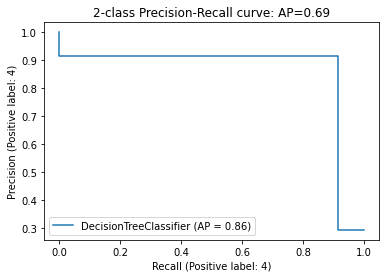

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

average_precision = average_precision_score(y_test, DT_clf.predict(X_test), pos_label=2)

disp = plot_precision_recall_curve(DT_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

## draw decision tree graph

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(DT_clf,
               out_file='tree.dot',
               feature_names=X.columns,
               class_names='Class',
               rounded=True,
               filled=True)

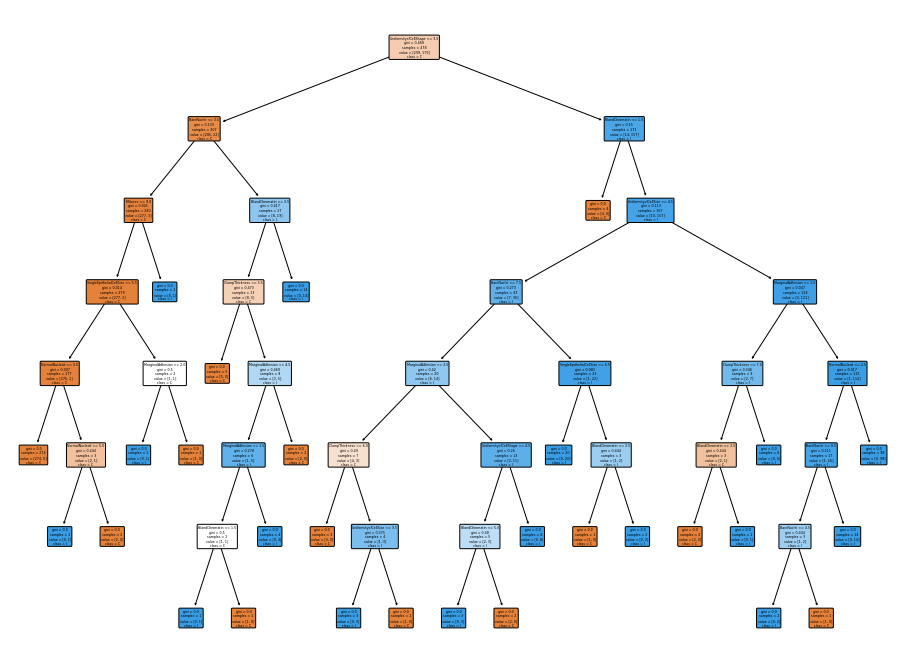

In [19]:
fig, ax = plt.subplots(figsize=(16, 12)) 

tree.plot_tree(DT_clf,
               feature_names=X.columns,
               class_names='Class',
               rounded=True,
               filled=True)
plt.show();

## Evaluating decision tree performane

The accuracy of the decision tree for the test data was 95% and due to the confusion matrix and precision-recall diagram it had an acceptable performance for classifying the test data.
The Precision and Recal diagrams also show that the performance of the decision tree is good for categorizing data.

## KNN model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## results of KNN model for train set

In [21]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train results:

Accuracy score: 0.9749 

Classification report:               precision    recall  f1-score   support

           2       0.99      0.97      0.98       299
           4       0.95      0.98      0.97       179

    accuracy                           0.97       478
   macro avg       0.97      0.98      0.97       478
weighted avg       0.98      0.97      0.97       478
 

Confusion matrix:
 [[290   9]
 [  3 176]] 

Average accuracy: 	 0.9602
Accuracy SD: 		 0.0237


## results of KNN model for test set

In [22]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy score: 0.9854 

Classification report:               precision    recall  f1-score   support

           2       0.99      0.99      0.99       145
           4       0.98      0.97      0.97        60

    accuracy                           0.99       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205
 

Confusion matrix:
 [[144   1]
 [  2  58]] 



## precision and recall score for KNN model

In [23]:
average_precision = average_precision_score(y_test, knn.predict(X_test), pos_label=2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


## precision and recall plot for KNN model

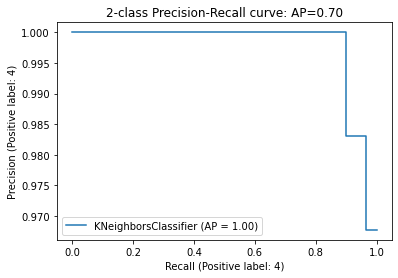

In [24]:
average_precision = average_precision_score(y_test, knn.predict(X_test), pos_label=2)

disp = plot_precision_recall_curve(knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

## Evaluating KNN performane
In this project, multiple nearest neighbor parameters have been checked to find optimal number for K.
We modeled KNN for k=1,2,3,4,5,6 and the best results achieved for k=5.
The KNN accuracy for test data is 98% and due to the confusion matrix and precision-recall diagram it has a very good performance for classifying test data.
The performance of the knn model in this project has been better than the decision tree.

## Gaussian Naive Bayes model

In [25]:
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)

GaussianNB()

## results of Gaussian Naive Bayes model for train set

In [26]:
print_score(GNB_clf, X_train, y_train, X_test, y_test, train=True)

Train results:

Accuracy score: 0.9561 

Classification report:               precision    recall  f1-score   support

           2       0.98      0.95      0.96       299
           4       0.92      0.97      0.94       179

    accuracy                           0.96       478
   macro avg       0.95      0.96      0.95       478
weighted avg       0.96      0.96      0.96       478
 

Confusion matrix:
 [[284  15]
 [  6 173]] 

Average accuracy: 	 0.9539
Accuracy SD: 		 0.0261


## results of Gaussian Naive Bayes model for test set

In [27]:
print_score(GNB_clf, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy score: 0.9707 

Classification report:               precision    recall  f1-score   support

           2       0.99      0.97      0.98       145
           4       0.92      0.98      0.95        60

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205
 

Confusion matrix:
 [[140   5]
 [  1  59]] 



## precision and recall score for Gaussian Naive Bayes model

In [28]:
average_precision = average_precision_score(y_test, GNB_clf.predict(X_test), pos_label=2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


## precision and recall plot for Gaussian Naive Bayes model

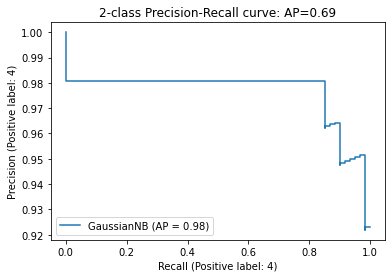

In [29]:
average_precision = average_precision_score(y_test, GNB_clf.predict(X_test), pos_label=2)

disp = plot_precision_recall_curve(GNB_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

## Evaluating Gaussian Naive Bayes performane
The Gaussian Naive Bayes accuracy for test data was 97% and due to the confusion matrix and precision-recall diagram it had an acceptable performance for classifying test data and its performance was worse than the knn and better than decision tree model.

## Random Forest model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## results of Random Forest model for train set

In [31]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train results:

Accuracy score: 1.0000 

Classification report:               precision    recall  f1-score   support

           2       1.00      1.00      1.00       299
           4       1.00      1.00      1.00       179

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478
 

Confusion matrix:
 [[299   0]
 [  0 179]] 

Average accuracy: 	 0.9644
Accuracy SD: 		 0.0249


## results of Random Forest model for test set

In [32]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy score: 0.9854 

Classification report:               precision    recall  f1-score   support

           2       0.99      0.99      0.99       145
           4       0.98      0.97      0.97        60

    accuracy                           0.99       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205
 

Confusion matrix:
 [[144   1]
 [  2  58]] 



## precision and recall score for Random Forest model

In [33]:
average_precision = average_precision_score(y_test, rf_clf.predict(X_test), pos_label=2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


## precision and recall plot for Random Forest model

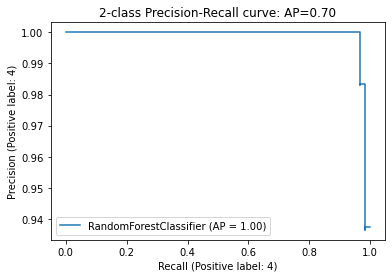

In [34]:
average_precision = average_precision_score(y_test, rf_clf.predict(X_test), pos_label=2)

disp = plot_precision_recall_curve(rf_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

## Evaluating Random Forest performane
The random forest accuracy for the test data was 98% and due to the confusion matrix and precision-recall diagram and it had very good performance for classifying the test data. Random forest performance has been better than GNB and the decision tree and was almost similar to knn.

## neural network model

In [35]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier()
nn_clf.fit(X_train, y_train)

F:\Anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

## results of neural network model for train set

In [36]:
print_score(nn_clf, X_train, y_train, X_test, y_test, train=True)

Train results:

Accuracy score: 0.9833 

Classification report:               precision    recall  f1-score   support

           2       0.99      0.98      0.99       299
           4       0.97      0.99      0.98       179

    accuracy                           0.98       478
   macro avg       0.98      0.98      0.98       478
weighted avg       0.98      0.98      0.98       478
 

Confusion matrix:
 [[293   6]
 [  2 177]] 



F:\Anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Average accuracy: 	 0.9623
Accuracy SD: 		 0.0225


F:\Anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## results of neural network model for test set

In [37]:
print_score(nn_clf, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy score: 0.9854 

Classification report:               precision    recall  f1-score   support

           2       0.99      0.99      0.99       145
           4       0.98      0.97      0.97        60

    accuracy                           0.99       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205
 

Confusion matrix:
 [[144   1]
 [  2  58]] 



## precision and recall score for neural network model

In [38]:
average_precision = average_precision_score(y_test, nn_clf.predict(X_test), pos_label=2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


## precision and recall plot for neural network model

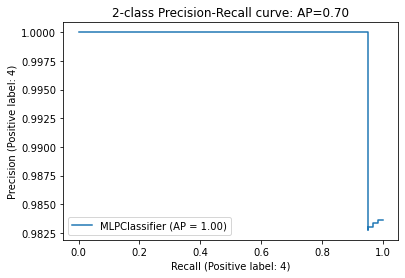

In [39]:
average_precision = average_precision_score(y_test, nn_clf.predict(X_test), pos_label=2)

disp = plot_precision_recall_curve(nn_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

## Evaluating neural network performane
The neural network accuracy for the test data was 96% and due to the confusion matrix and precision-recall diagram and it had a very good performance for classifying the test data. The performance of the neural network was better than GNB and decision tree and was almost similar to knn and random forest.

## compare results of models

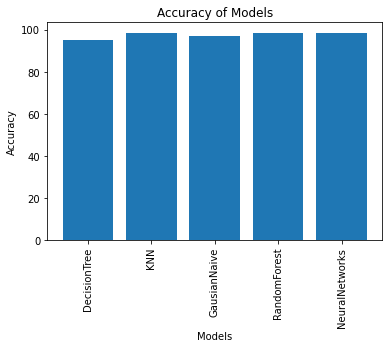

In [40]:
results = {}
results['DecisionTree'] = accuracy_score(y_test, DT_clf.predict(X_test))*100
results['KNN'] = accuracy_score(y_test, knn.predict(X_test))*100
results['GausianNaive'] = accuracy_score(y_test, GNB_clf.predict(X_test))*100
results['RandomForest'] = accuracy_score(y_test, rf_clf.predict(X_test))*100
results['NeuralNetworks'] = accuracy_score(y_test, nn_clf.predict(X_test))*100

plt.bar(range(len(results)), results.values(), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation='vertical')
plt.title("Accuracy of Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

## Concolusion
According to the comparison diagram of the accuracy of the models, confusion matrix and precision-recall diagram, all models had good performance, but for this data set the neural network, knn and random forest was better than the others.